# 1. Libraries & Sample Data
The first step is to load our Python Libraries and download the sample data. The dataset represents Apple stock price (1d bars) for the year 2010

In [78]:
# Load Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from IPython.display import display, HTML
# for dataframe display
pd.set_option("display.max_rows", None)
def display_df(df):
    # Puts the scrollbar next to the DataFrame
    display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" + df.to_html() + "</div>"))

In [79]:
# Download Sample Data AAPL_2009-2010_6m_features_1d.csv
data = pd.read_csv("AAPL_2009-2010_6m_all_features_1d.csv")
# Display the first few rows of the dataset
display_df(data.head())

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,STD20,BB_upper,BB_lower,Log_Ret,Vol20
0,2009-04-30,4.507857,4.535714,4.461429,4.493929,3.799404,498489600.0,4.453572,4.312857,0.128631,4.570118,4.055596,0.005499,0.287544
1,2009-05-01,4.492857,4.569643,4.492857,4.544286,3.841980,397516000.0,4.477429,4.338804,0.119607,4.578017,4.099590,0.011143,0.267026
2,2009-05-04,4.580000,4.723214,4.560000,4.716786,3.987818,609358400.0,4.529857,4.367518,0.137583,4.642685,4.092351,0.037257,0.278159
3,2009-05-05,4.580000,4.723214,4.560000,4.716786,3.987818,609358400.0,4.588214,4.391839,0.154067,4.699974,4.083704,0.000000,0.273591
4,2009-05-06,4.761786,4.767857,4.650714,4.732143,4.000803,473538800.0,4.640786,4.416929,0.166724,4.750376,4.083481,0.003251,0.272976


# 5. State Space Representation
Now we have a set of data with OHLC data plus some techinchal indicators. Using this data, construct the state space matrix, where features of the state space are Close Price, 5-day Moving Average, 20-day Moving Average, Bollinger Bands (upper and lower), and 20-day Historical Volatility of Close Price.

In [80]:
# Construct the State Space Matrix
dataset = data[['Close', 'MA5', 'MA20', 'BB_upper', 'BB_lower', 'Vol20']].copy()
display_df(dataset)

,Close,MA5,MA20,BB_upper,BB_lower,Vol20
0,4.493929,4.453572,4.312857,4.570118,4.055596,0.287544
1,4.544286,4.477429,4.338804,4.578017,4.099590,0.267026
2,4.716786,4.529857,4.367518,4.642685,4.092351,0.278159
3,4.716786,4.588214,4.391839,4.699974,4.083704,0.273591
4,4.732143,4.640786,4.416929,4.750376,4.083481,0.272976
5,4.609286,4.663857,4.439679,4.759484,4.119873,0.283717
6,4.613929,4.677786,4.456857,4.775274,4.138440,0.271348
7,4.627500,4.659929,4.473554,4.790938,4.156169,0.271302
8,4.443571,4.605286,4.484464,4.780187,4.188741,0.306691
9,4.267500,4.512357,4.487768,4.771407,4.204128,0.341807


# 6. Z-Score Normalization
Now that we have cleaned our data, and created our features of interest, we must normalize our data. For this example, we use the sklearn StandardScaler, which centers the data and normalizes to unit variance (i.e. performs z-score normalization for us). Do this in a simple, non-rolling fashion.

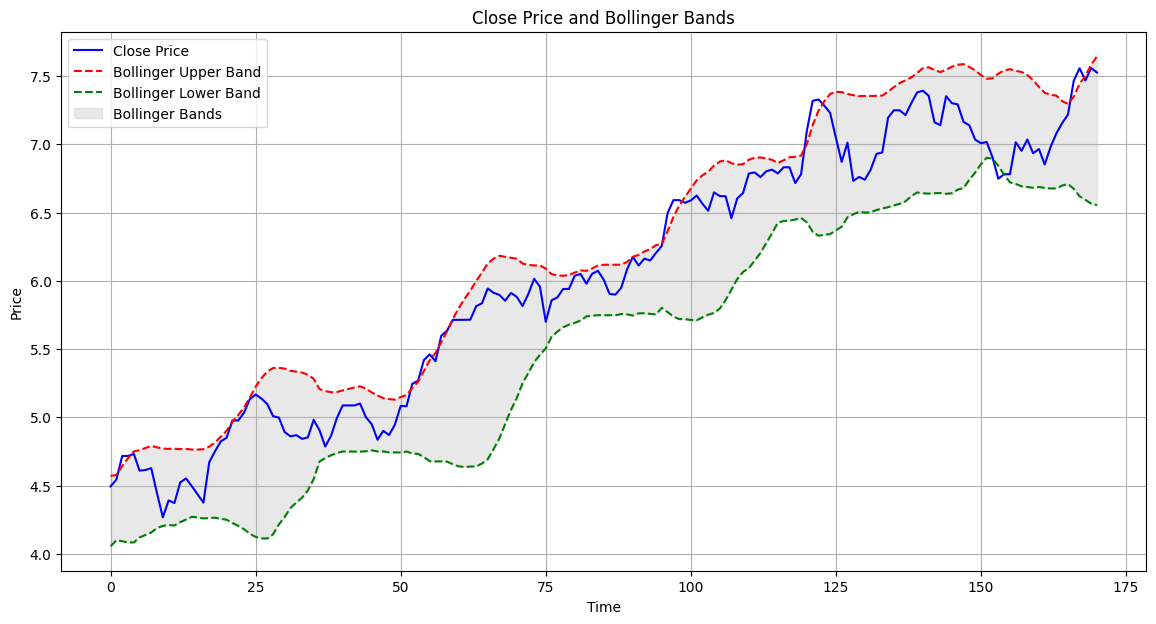

In [36]:
# Plot Un-normalized Close Price and Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(dataset['Close'], label='Close Price', color='blue')
plt.plot(dataset['BB_upper'], label='Bollinger Upper Band', color='red', linestyle='--')
plt.plot(dataset['BB_lower'], label='Bollinger Lower Band', color='green', linestyle='--')
plt.fill_between(dataset.index, dataset['BB_upper'], dataset['BB_lower'], 
                 color='lightgray', alpha=0.5, label='Bollinger Bands')
plt.title('Close Price and Bollinger Bands')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [37]:
# Normalize Dataset with StandardScaler
static_normed_dataset = pd.DataFrame(index=dataset.index, columns=dataset.columns)
for col in dataset.columns:
    if col == 'Date':
        static_normed_dataset[col] = dataset[col]
        continue
    normalizer = StandardScaler()  # create normalizer 
    column_data =  dataset[col].values.reshape(-1, 1)  # reshape data for normalizer
    # fit normalizer, transform data column with fitted normalizer, put transformed column in normed dataframe
    static_normed_dataset[col] = normalizer.fit_transform(column_data).flatten()  # flatten to 1D array
display_df(static_normed_dataset)

,Close,MA5,MA20,BB_upper,BB_lower,Vol20
0,-1.608746,-1.619760,-1.623591,-1.687748,-1.526756,0.381032
1,-1.556090,-1.594713,-1.596585,-1.679774,-1.480366,-0.002786
2,-1.375714,-1.539671,-1.566697,-1.614489,-1.488000,0.205470
3,-1.375714,-1.478405,-1.541382,-1.556652,-1.497117,0.120027
4,-1.359656,-1.423213,-1.515267,-1.505769,-1.497353,0.108523
5,-1.488122,-1.398992,-1.491588,-1.496574,-1.458979,0.309452
6,-1.483268,-1.384369,-1.473707,-1.480633,-1.439401,0.078051
7,-1.469077,-1.403116,-1.456328,-1.464820,-1.420707,0.077205
8,-1.661403,-1.460483,-1.444972,-1.475673,-1.386361,0.739229
9,-1.845513,-1.558044,-1.441533,-1.484537,-1.370136,1.396135


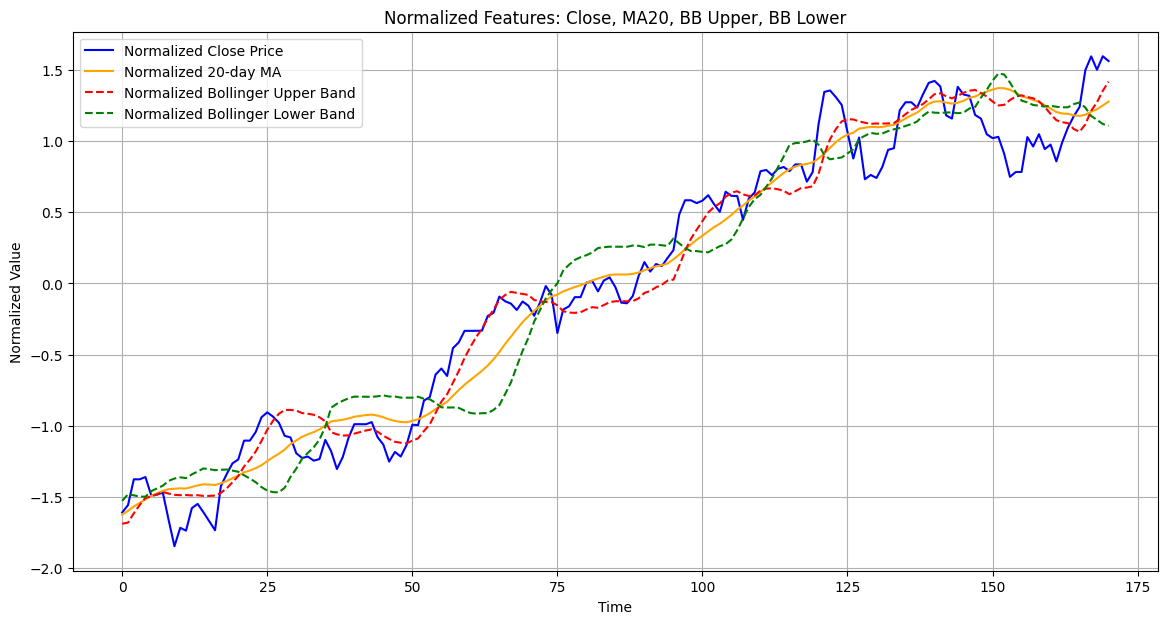

In [38]:
# Plot Normalized Features: Close, MA20, BB Upper, BB Lower
plt.figure(figsize=(14, 7))
plt.plot(static_normed_dataset['Close'], label='Normalized Close Price', color='blue')
plt.plot(static_normed_dataset['MA20'], label='Normalized 20-day MA', color='orange')
plt.plot(static_normed_dataset['BB_upper'], label='Normalized Bollinger Upper Band', color='red', linestyle='--')
plt.plot(static_normed_dataset['BB_lower'], label='Normalized Bollinger Lower Band', color='green', linestyle='--')
plt.title('Normalized Features: Close, MA20, BB Upper, BB Lower')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()
plt.show()

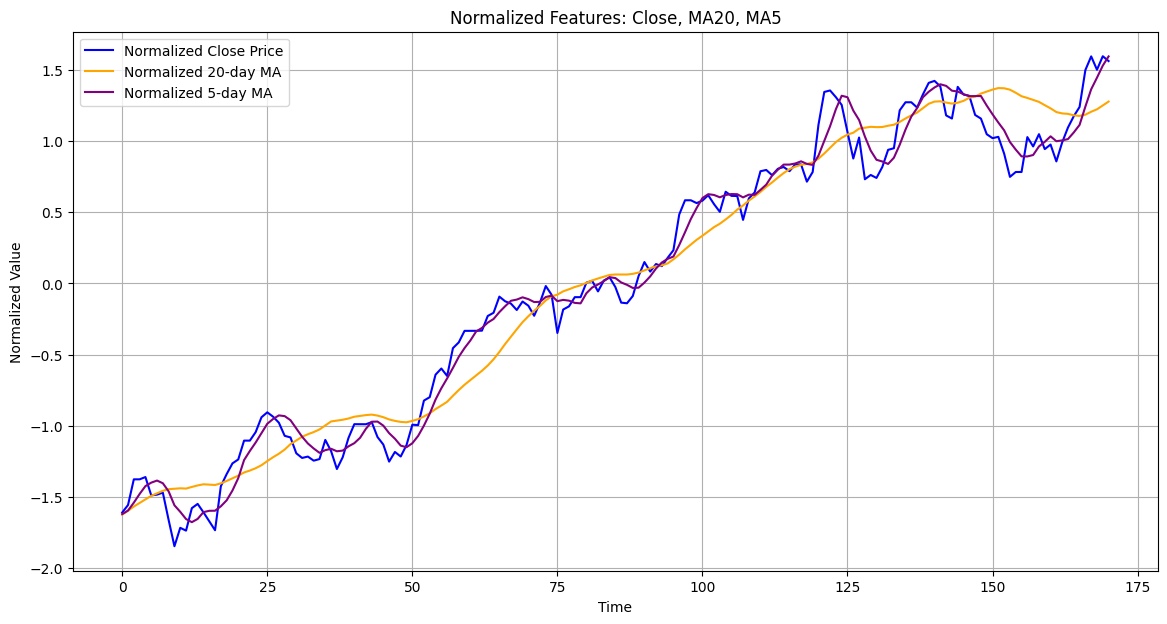

In [39]:
# Plot Normalized Features: Close, MA20, MA5
plt.figure(figsize=(14, 7))
plt.plot(static_normed_dataset['Close'], label='Normalized Close Price', color='blue')
plt.plot(static_normed_dataset['MA20'], label='Normalized 20-day MA', color='orange')
plt.plot(static_normed_dataset['MA5'], label='Normalized 5-day MA', color='purple')
plt.title('Normalized Features: Close, MA20, MA5')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()
plt.show()

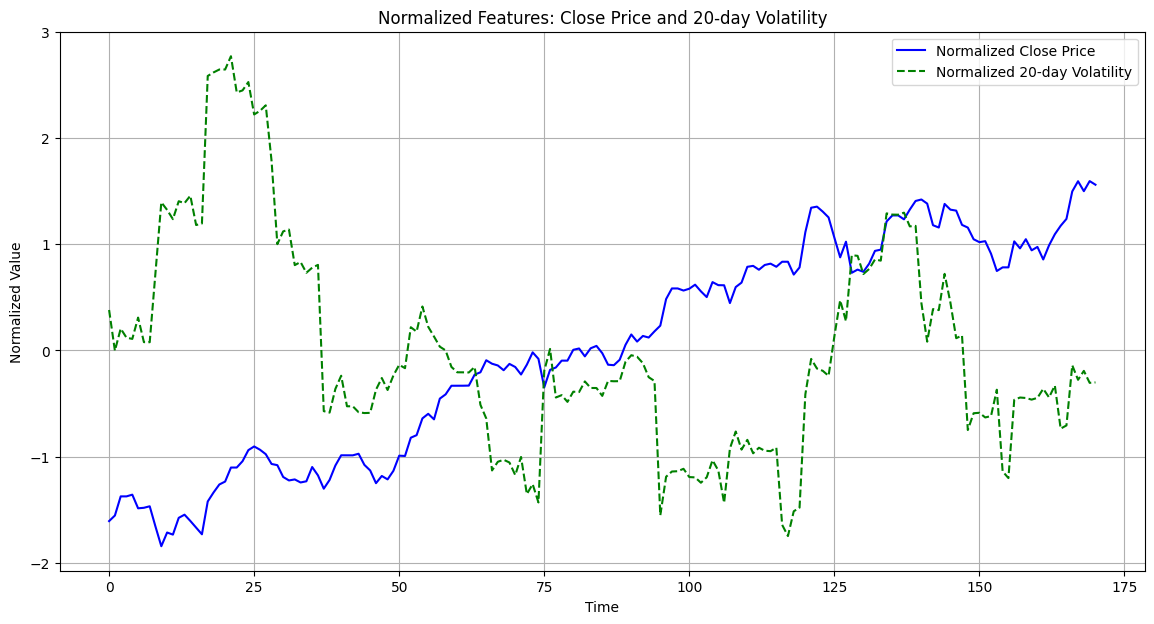

In [40]:
# Plot Normalized Features: Close, Volatility
plt.figure(figsize=(14, 7))
plt.plot(static_normed_dataset['Close'], label='Normalized Close Price', color='blue')
plt.plot(static_normed_dataset['Vol20'], label='Normalized 20-day Volatility',
            color='green', linestyle='--')
plt.title('Normalized Features: Close Price and 20-day Volatility')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()
plt.show()

# 7. Rolling Z-Score Normalization
Now that we have cleaned our data, and created our features of interest, we must normalize our data. For this example, we use the sklearn StandardScaler, which centers the data and normalizes to unit variance. Due to the fact that our data is time-series data, it is best practice to do this in a rolling fashion. We choose 20 days as our window for normalization, and run the StandardScaler in a rolling (non-overlapping) fashion. 

In [41]:
# Display raw dataset (unnormalized) 
display_df(dataset)

,Close,MA5,MA20,BB_upper,BB_lower,Vol20
0,4.493929,4.453572,4.312857,4.570118,4.055596,0.287544
1,4.544286,4.477429,4.338804,4.578017,4.099590,0.267026
2,4.716786,4.529857,4.367518,4.642685,4.092351,0.278159
3,4.716786,4.588214,4.391839,4.699974,4.083704,0.273591
4,4.732143,4.640786,4.416929,4.750376,4.083481,0.272976
5,4.609286,4.663857,4.439679,4.759484,4.119873,0.283717
6,4.613929,4.677786,4.456857,4.775274,4.138440,0.271348
7,4.627500,4.659929,4.473554,4.790938,4.156169,0.271302
8,4.443571,4.605286,4.484464,4.780187,4.188741,0.306691
9,4.267500,4.512357,4.487768,4.771407,4.204128,0.341807


In [42]:
# Normalize the chosen price data & features
normed_dataset = pd.DataFrame(index=dataset.index, columns=dataset.columns)
step = 20
for col in dataset.columns:
    n = 0
    if col == 'Date':
        normed_dataset[col] = dataset[col]
        continue
    while n <= len(data.index):
        normalizer = StandardScaler()  # create normalizer
        if n == 0:
            column_data = dataset[col].iloc[:step].values.reshape(-1, 1)
            normed_dataset.loc[dataset.index[:step], col] = normalizer.fit_transform(column_data).flatten()
        elif n + step >= len(data.index):
            column_data = dataset[col].iloc[n:].values.reshape(-1, 1)
            normed_dataset.loc[dataset.index[n:], col] = normalizer.fit_transform(column_data).flatten()
        else:
            column_data = dataset[col].iloc[n:n+step].values.reshape(-1, 1)
            normed_dataset.loc[dataset.index[n:n+step], col] = normalizer.fit_transform(column_data).flatten()
        n += step
display_df(normed_dataset)

,Close,MA5,MA20,BB_upper,BB_lower,Vol20
0,-0.435352,-0.885559,-2.318873,-2.518819,-1.783439,-0.751377
1,-0.092038,-0.609041,-1.926799,-2.406568,-1.178392,-1.200617
2,1.084005,-0.001364,-1.492901,-1.487533,-1.277951,-0.956864
3,1.084005,0.675028,-1.125383,-0.673353,-1.396869,-1.056871
4,1.188703,1.284361,-0.746261,0.042941,-1.39994,-1.070336
5,0.351109,1.551771,-0.402489,0.172378,-0.899445,-0.835159
6,0.382763,1.713211,-0.142906,0.396784,-0.644098,-1.106002
7,0.475287,1.506237,0.109393,0.619392,-0.400272,-1.106991
8,-0.778673,0.872894,0.274263,0.466608,0.047685,-0.332126
9,-1.979062,-0.204201,0.324182,0.341828,0.259302,0.436749


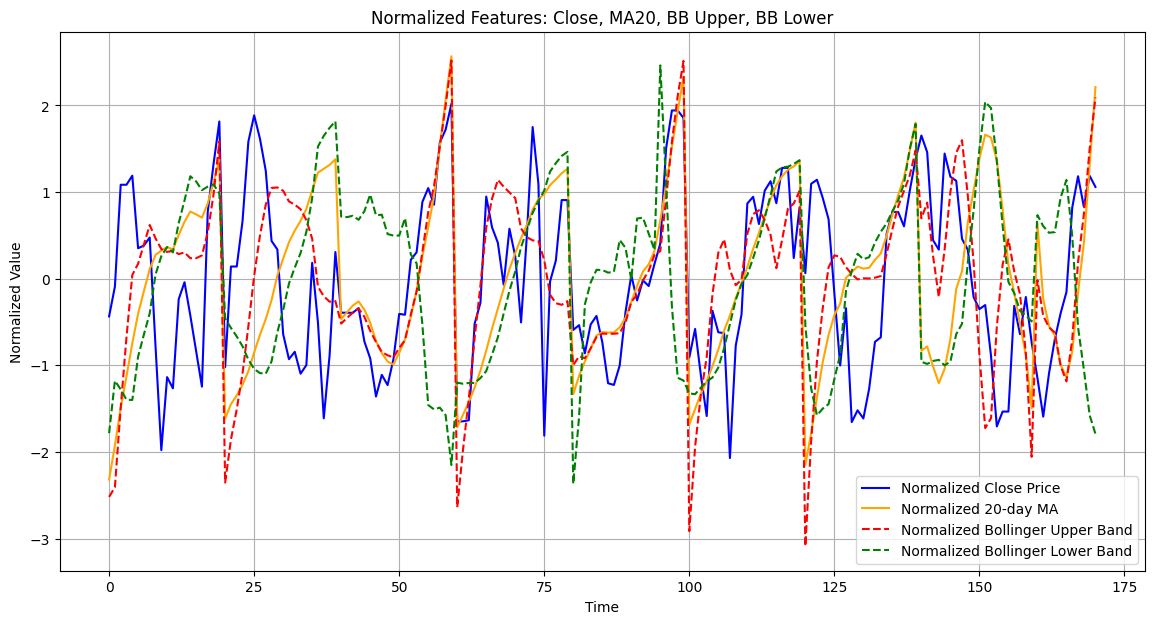

In [43]:
# Plot Normalized Features: Close, MA20, BB Upper, BB Lower
plt.figure(figsize=(14, 7))
plt.plot(normed_dataset['Close'], label='Normalized Close Price', color='blue')
plt.plot(normed_dataset['MA20'], label='Normalized 20-day MA', color
='orange')
plt.plot(normed_dataset['BB_upper'], label='Normalized Bollinger Upper Band', color  ='red', linestyle='--')
plt.plot(normed_dataset['BB_lower'], label='Normalized Bollinger Lower Band', color='green', linestyle='--')
plt.title('Normalized Features: Close, MA20, BB Upper, BB Lower')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()
plt.show()

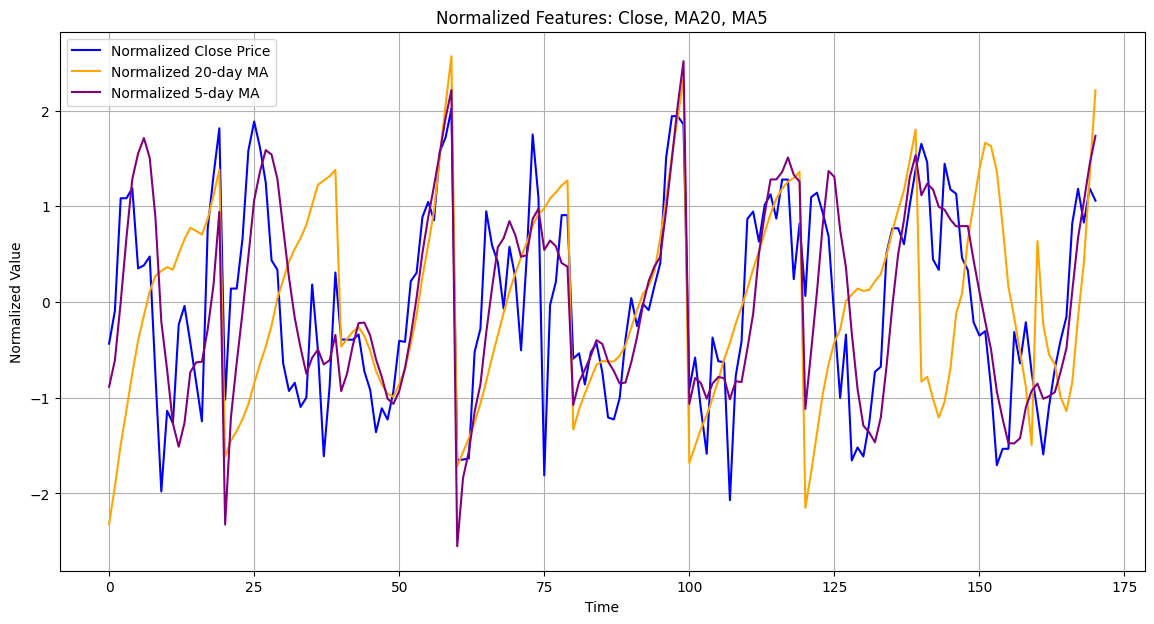

In [44]:
# Plot Normalized Features: Close, MA20, MA5
plt.figure(figsize=(14, 7))
plt.plot(normed_dataset['Close'], label='Normalized Close Price', color='blue')
plt.plot(normed_dataset['MA20'], label='Normalized 20-day MA', color='orange')
plt.plot(normed_dataset['MA5'], label='Normalized 5-day MA', color='purple')
plt.title('Normalized Features: Close, MA20, MA5')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()
plt.show()

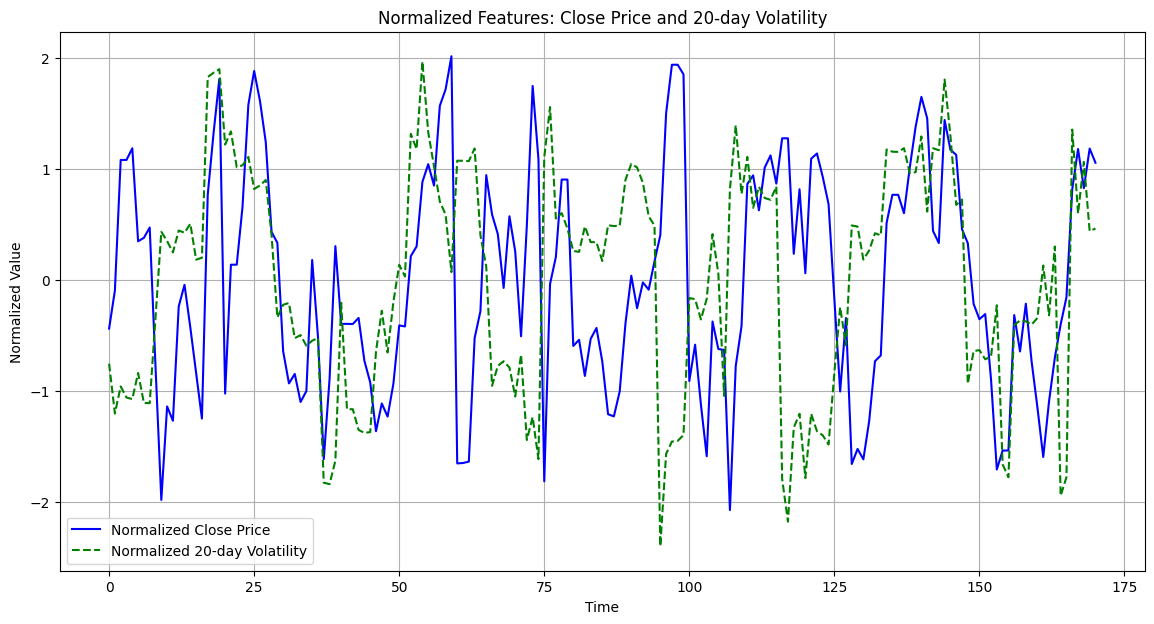

In [45]:
# Plot Normalized Features: Close, Volatility
plt.figure(figsize=(14, 7))
plt.plot(normed_dataset['Close'], label='Normalized Close Price', color='blue')
plt.plot(normed_dataset['Vol20'], label='Normalized 20-day Volatility',
            color='green', linestyle='--')
plt.title('Normalized Features: Close Price and 20-day Volatility')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()
plt.show()

In [100]:
# Download Sample Data AAPL_2009-2010_6m_features_1d.csv
data = pd.read_csv("AAPL_2009-2010_6m_all_features_1d.csv")
# Display the first few rows of the dataset
display_df(data.head())

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,STD20,BB_upper,BB_lower,Log_Ret,Vol20
0,2009-04-30,4.507857,4.535714,4.461429,4.493929,3.799404,498489600.0,4.453572,4.312857,0.128631,4.570118,4.055596,0.005499,0.287544
1,2009-05-01,4.492857,4.569643,4.492857,4.544286,3.841980,397516000.0,4.477429,4.338804,0.119607,4.578017,4.099590,0.011143,0.267026
2,2009-05-04,4.580000,4.723214,4.560000,4.716786,3.987818,609358400.0,4.529857,4.367518,0.137583,4.642685,4.092351,0.037257,0.278159
3,2009-05-05,4.580000,4.723214,4.560000,4.716786,3.987818,609358400.0,4.588214,4.391839,0.154067,4.699974,4.083704,0.000000,0.273591
4,2009-05-06,4.761786,4.767857,4.650714,4.732143,4.000803,473538800.0,4.640786,4.416929,0.166724,4.750376,4.083481,0.003251,0.272976


In [101]:
# Construct the State Space Matrix
train_df = data[['Close', 'MA5', 'MA20', 'BB_upper', 'BB_lower', 'Vol20']].copy()
train_df.head()

,Close,MA5,MA20,BB_upper,BB_lower,Vol20
0,4.493929,4.453572,4.312857,4.570118,4.055596,0.287544
1,4.544286,4.477429,4.338804,4.578017,4.099590,0.267026
2,4.716786,4.529857,4.367518,4.642685,4.092351,0.278159
3,4.716786,4.588214,4.391839,4.699974,4.083704,0.273591
4,4.732143,4.640786,4.416929,4.750376,4.083481,0.272976


In [102]:
# 1. Define the numeric columns to normalize
num_cols = ['Close', 'MA5', 'MA20', 'BB_upper', 'BB_lower', 'Vol20']

# 2. Check if all required columns exist in the dataset (your excellent check)
missing_cols = [col for col in num_cols if col not in train_df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in training dataframe: {missing_cols}")
else:
    print(f"All required columns are present in the training dataframe: {num_cols}")

# 3. Initialize ONE scaler
scaler = StandardScaler()

# 4. Create copies of the dataframes to avoid 'SettingWithCopyWarning'
train_normed_df = train_df.copy()

# 5. Fit the scaler ONLY on the training data and transform it in one step
#    This learns the mean/std from the training set and applies the scaling.
train_normed_df[num_cols] = scaler.fit_transform(train_df[num_cols])


# 7. Display the results to verify
print("--- Original Training Data Head ---")
# display_df(train_df.head()) # Use your display function
print(train_df[num_cols].head())

print("\n--- Normalized Training Data Head ---")
# display_df(train_normed_df.head())
print(train_normed_df[num_cols].head())

# You can inspect the scaler to see what it learned from the training data
print(f"\nScaler Mean (learned from train set): {scaler.mean_}")
print(f"Scaler Scale (Std Dev from train set): {scaler.scale_}")

All required columns are present in the training dataframe: ['Close', 'MA5', 'MA20', 'BB_upper', 'BB_lower', 'Vol20']
--- Original Training Data Head ---
      Close       MA5      MA20  BB_upper  BB_lower     Vol20
0  4.493929  4.453572  4.312857  4.570118  4.055596  0.287544
1  4.544286  4.477429  4.338804  4.578017  4.099590  0.267026
2  4.716786  4.529857  4.367518  4.642685  4.092351  0.278159
3  4.716786  4.588214  4.391839  4.699974  4.083704  0.273591
4  4.732143  4.640786  4.416929  4.750376  4.083481  0.272976

--- Normalized Training Data Head ---
      Close       MA5      MA20  BB_upper  BB_lower     Vol20
0 -1.608746 -1.619760 -1.623591 -1.687748 -1.526756  0.381032
1 -1.556090 -1.594713 -1.596585 -1.679774 -1.480366 -0.002786
2 -1.375714 -1.539671 -1.566697 -1.614489 -1.488000  0.205470
3 -1.375714 -1.478405 -1.541382 -1.556652 -1.497117  0.120027
4 -1.359656 -1.423213 -1.515267 -1.505769 -1.497353  0.108523

Scaler Mean (learned from train set): [6.03243105 5.99642312 5

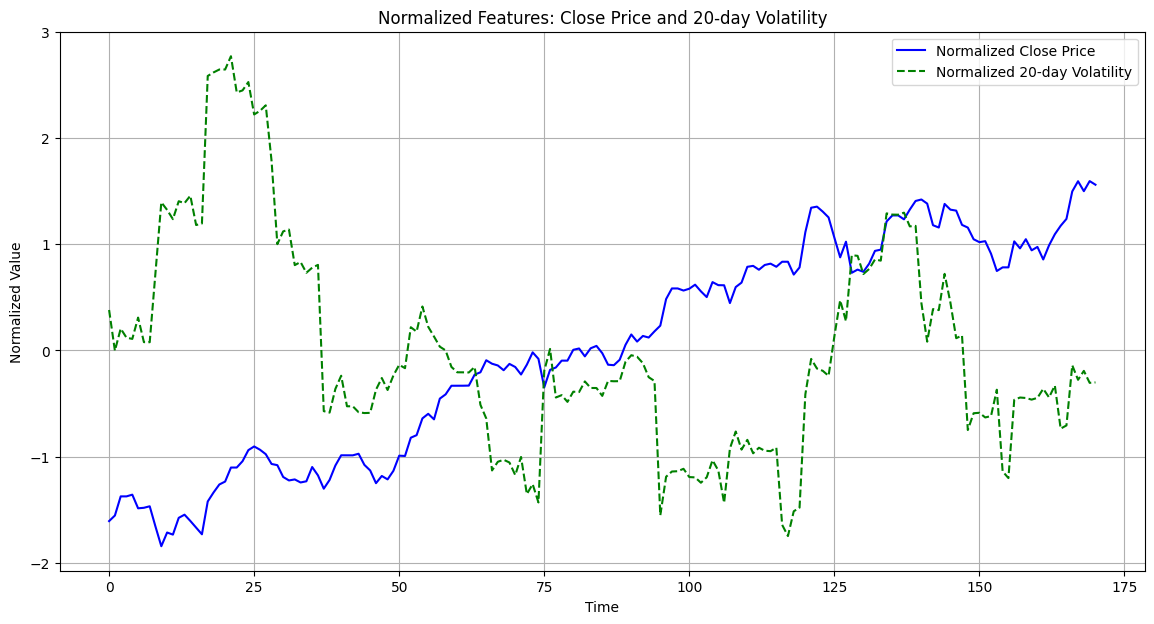

In [103]:
# Plot Normalized Features: Close, Volatility
plt.figure(figsize=(14, 7))
plt.plot(train_normed_df['Close'], label='Normalized Close Price', color='blue')
plt.plot(train_normed_df['Vol20'], label='Normalized 20-day Volatility',
            color='green', linestyle='--')
plt.title('Normalized Features: Close Price and 20-day Volatility')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()
plt.show()

In [106]:
# Define the numeric columns to normalize
num_cols = ['Close', 'MA5', 'MA20', 'BB_upper', 'BB_lower', 'Vol20']

# Assume 'dataset' is your DataFrame with columns like 'Close', 'Volume'
window_size = 20

# --- Improved Code ---

# Create an empty DataFrame to store the results
normed_train_df_rolling = pd.DataFrame(index=train_df.index)

# Loop through the columns you want to normalize
for col in num_cols: # Add other columns as needed
    # 1. Calculate the rolling mean and standard deviation
    rolling_mean = train_df[col].rolling(window=window_size).mean()
    rolling_std = train_df[col].rolling(window=window_size).std()

    # 2. Apply the rolling Z-score formula
    normed_train_df_rolling[f'{col}_rolling_norm'] = (train_df[col] - rolling_mean) / rolling_std

# The first `window_size - 1` rows will be NaN because there's no full window yet.
# We can fill them with 0 or drop them, depending on the use case.
normed_train_df_rolling = normed_train_df_rolling.fillna(0)

print("--- Rolling Window Normalized Data ---")
display_df(normed_train_df_rolling.head(25)) # Show more rows to see the values appear

--- Rolling Window Normalized Data ---


,Close_rolling_norm,MA5_rolling_norm,MA20_rolling_norm,BB_upper_rolling_norm,BB_lower_rolling_norm,Vol20_rolling_norm
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


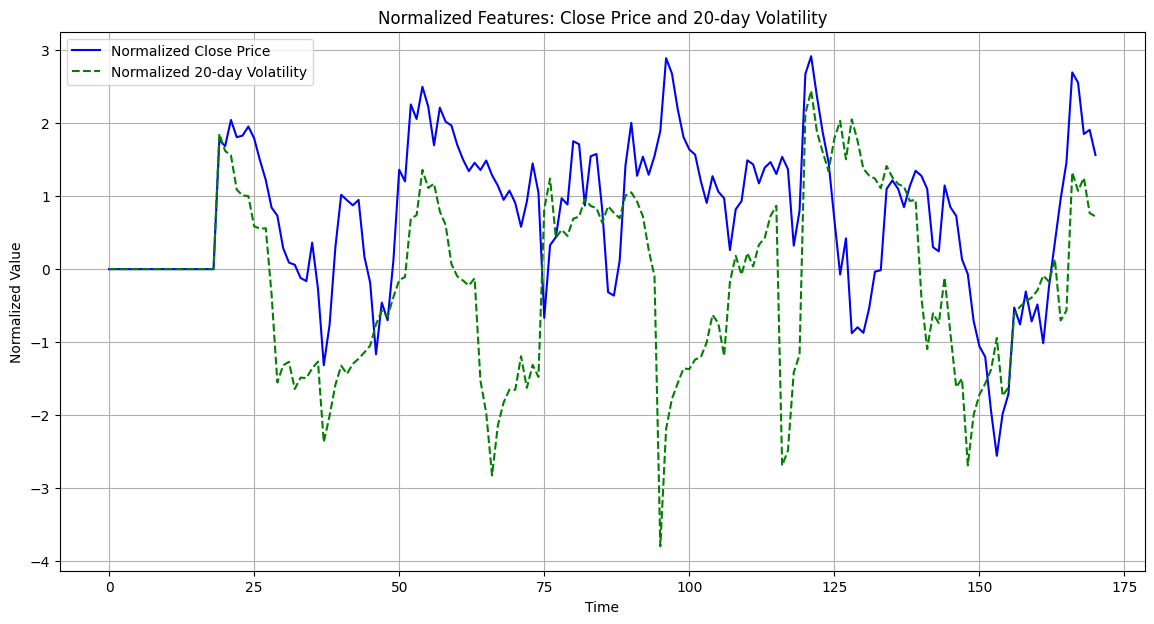

In [111]:
# Plot Normalized Features: Close, Volatility
plt.figure(figsize=(14, 7))
plt.plot(normed_train_df_rolling['Close_rolling_norm'], label='Normalized Close Price', color='blue')
plt.plot(normed_train_df_rolling['Vol20_rolling_norm'], label='Normalized 20-day Volatility',
            color='green', linestyle='--')
plt.title('Normalized Features: Close Price and 20-day Volatility')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()
plt.show()